In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
# mpg 데이터에 이상치 할당
mpg = pd.read_csv('../mpg.csv')

# drv 이상치 할당
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'

# cty 이상치 할당
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]


### Q1.
drv에 이상이 있는지 확인하세요.   
이상치를 결측 처리한 다음 이상치가 사라졌는지 확인하세요.  
결측 처리를 할 때는 df.isin()을 활용하세요.  

In [23]:
mpg['drv'].value_counts()

f    106
4    100
r     24
k      4
Name: drv, dtype: int64

In [24]:
mpg['drv'] = np.where(mpg['drv'].isin(['4', 'f', 'r']), mpg['drv'], np.nan)
pd.isna(mpg).sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             4
cty             0
hwy             0
fl              0
category        0
dtype: int64

In [25]:
mpg['drv'].value_counts()

f    106
4    100
r     24
Name: drv, dtype: int64

### Q2.
상자 그림을 이용해 cty에 이상치가 있는지 확인하세요.  
상자 그림 기준으로 정상 범위를 벗어난 값을 결측 처리한 다음 다시 상자 그림을 만들어 이상치가 사라졌는지 확인하세요.  

<AxesSubplot:ylabel='cty'>

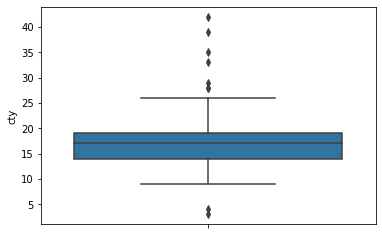

In [26]:
sns.boxplot(data = mpg, y = 'cty')

In [27]:
pct25 = mpg['cty'].quantile(.25)

In [28]:
pct75 = mpg['cty'].quantile(.75)

In [29]:
iqr = pct75 - pct25
iqr

5.0

In [30]:
pct25 - iqr * 1.5

6.5

In [31]:
pct75 + iqr * 1.5

26.5

In [32]:
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5),
        np.nan, mpg['cty'])
mpg['cty'].isna().sum()

9

<AxesSubplot:ylabel='cty'>

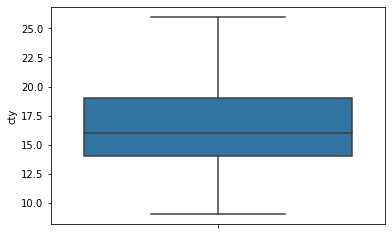

In [33]:
mpg.dropna(subset=['cty']) # 이상치 제거
sns.boxplot(data = mpg, y = 'cty')

### Q3.
두 변수의 이상치를 결측 처리했으니 이제 분석할 차례입니다.  
이상치를 제거한 다음 drv별로 cty 평균이 어떻게 다른지 알아보세요.  
하나의 pandas 구문으로 만들어야 합니다.

In [34]:
mpg.groupby('drv').agg(mean_cty=('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
